<a href="https://colab.research.google.com/github/savi3alwis/DATA-6550-Algorithms/blob/main/Module_4_Project_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Discrimination and Algorithmic Bias
## Module 4: Algorithmic Bias
### By: Savi Alwis, Moses Kipkemboi, Muqtasid Qureshi, Pallavi Suram

In [3]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
url = "https://raw.githubusercontent.com/Group4-s2025/DATA-6550-Algorithms/refs/heads/main/Data/mortgage_covenant_data.csv"
df = pd.read_csv(url)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100931 entries, 0 to 100930
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   activity_year                      100931 non-null  int64  
 1   census_tract                       99915 non-null   float64
 2   derived_race                       100931 non-null  object 
 3   action_taken                       100931 non-null  int64  
 4   loan_amount                        100931 non-null  float64
 5   property_value                     83491 non-null   float64
 6   income                             88200 non-null   float64
 7   interest_rate                      78125 non-null   float64
 8   tract_minority_population_percent  100931 non-null  float64
 9   tract_to_msa_income_percentage     100931 non-null  float64
 10  denial_reason-1                    100931 non-null  int64  
 11  covenant_count                     1009

In [6]:
df['covenant_density'].value_counts()

None                89762
Low (1-50)           4537
Very High (>200)     3140
Medium (51-100)      1772
High (101-200)       1720
Name: covenant_density, dtype: int64

In [7]:
df.head()

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
0,2023,2.703706e+10,Race Not Available,6,185000.0,195000.0,NaN,6.125,40.37,73.48,10,0.0,False,None
1,2023,2.714103e+10,Race Not Available,6,375000.0,385000.0,NaN,6.625,10.64,121.26,10,0.0,False,None
2,2023,2.702395e+10,Race Not Available,6,105000.0,105000.0,NaN,6.125,8.92,90.13,10,0.0,False,None
3,2023,2.717110e+10,Race Not Available,6,285000.0,285000.0,NaN,6.750,13.27,104.37,10,0.0,False,None
4,2023,2.715948e+10,Race Not Available,6,175000.0,175000.0,NaN,6.875,5.87,82.22,10,0.0,False,None


In [8]:
df['activity_year'].value_counts()

2023    100931
Name: activity_year, dtype: int64

In [9]:
df['census_tract'].value_counts()

2.705303e+10    606
2.716307e+10    580
2.705303e+10    432
2.705303e+10    420
2.717110e+10    384
               ... 
2.712304e+10      4
2.712303e+10      3
2.713700e+10      2
2.714501e+10      1
2.710900e+10      1
Name: census_tract, Length: 1494, dtype: int64

In [10]:
df['derived_race'].value_counts()

White                                        63627
Race Not Available                           22811
Asian                                         5905
Black or African American                     5199
Joint                                         2427
American Indian or Alaska Native               709
2 or more minority races                       135
Native Hawaiian or Other Pacific Islander      113
Free Form Text Only                              5
Name: derived_race, dtype: int64

In [11]:
df['action_taken'].value_counts()

1    65329
6    15687
4    10508
3     5796
2     1756
5     1320
8      375
7      160
Name: action_taken, dtype: int64

In [12]:
df['loan_amount'].value_counts()

15000.0       3841
245000.0      3119
255000.0      3107
265000.0      2993
305000.0      2991
              ... 
1865000.0        1
4165000.0        1
14005000.0       1
1945000.0        1
2015000.0        1
Name: loan_amount, Length: 359, dtype: int64

In [13]:
df['property_value'].value_counts()

255000.0      2527
275000.0      2499
285000.0      2498
265000.0      2440
325000.0      2428
              ... 
74305000.0       1
2115000.0        1
3425000.0        1
2335000.0        1
9005000.0        1
Name: property_value, Length: 379, dtype: int64

In [14]:
df['income'].value_counts()

80.0       1017
60.0       1016
70.0        958
75.0        951
90.0        915
           ... 
1760.0        1
10415.0       1
3215.0        1
2185.0        1
1087.0        1
Name: income, Length: 1141, dtype: int64

In [15]:
df['interest_rate'].value_counts()

6.625    5131
6.500    4921
6.750    4699
6.875    4568
7.125    3904
         ... 
6.267       1
5.991       1
6.774       1
6.216       1
7.820       1
Name: interest_rate, Length: 1319, dtype: int64

In [16]:
df['tract_minority_population_percent'].value_counts()

0.00     1016
20.69     649
27.78     580
10.98     573
14.61     441
         ... 
83.09       6
27.64       5
43.94       4
95.63       3
23.88       1
Name: tract_minority_population_percent, Length: 1245, dtype: int64

In [17]:
df['tract_to_msa_income_percentage'].value_counts()

0.00      1162
121.35     606
156.68     580
95.42      561
104.59     441
          ... 
113.97       6
124.72       6
33.47        3
38.37        2
57.35        1
Name: tract_to_msa_income_percentage, Length: 1371, dtype: int64

In [18]:
df['denial_reason-1'].value_counts()

10      91544
1111     3576
1        2231
3        1204
4         773
9         471
7         401
5         279
6         271
2         180
8           1
Name: denial_reason-1, dtype: int64

In [19]:
df['covenant_count'].value_counts()

0.0      89762
1.0        684
3.0        532
2.0        488
212.0      294
         ...  
176.0       29
15.0        28
57.0        27
126.0       27
485.0       25
Name: covenant_count, Length: 112, dtype: int64

In [20]:
df['was_approved'].value_counts()

True     67085
False    33846
Name: was_approved, dtype: int64

In [21]:
df['was_approved'] = df['was_approved'].astype(int)
df['was_approved'].value_counts()

1    67085
0    33846
Name: was_approved, dtype: int64

In [22]:
df['covenant_density'].value_counts()

None                89762
Low (1-50)           4537
Very High (>200)     3140
Medium (51-100)      1772
High (101-200)       1720
Name: covenant_density, dtype: int64

In [23]:
df_app = df[df['was_approved'] ==1]
df_rej = df[df['was_approved'] ==0]

In [24]:
df2= df.copy()

In [25]:
df2 = df2.dropna()

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66858 entries, 62 to 100923
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   activity_year                      66858 non-null  int64  
 1   census_tract                       66858 non-null  float64
 2   derived_race                       66858 non-null  object 
 3   action_taken                       66858 non-null  int64  
 4   loan_amount                        66858 non-null  float64
 5   property_value                     66858 non-null  float64
 6   income                             66858 non-null  float64
 7   interest_rate                      66858 non-null  float64
 8   tract_minority_population_percent  66858 non-null  float64
 9   tract_to_msa_income_percentage     66858 non-null  float64
 10  denial_reason-1                    66858 non-null  int64  
 11  covenant_count                     66858 non-null  f

### Initial Analysis

In [28]:
df['derived_race'].value_counts()

White                                        63627
Race Not Available                           22811
Asian                                         5905
Black or African American                     5199
Joint                                         2427
American Indian or Alaska Native               709
2 or more minority races                       135
Native Hawaiian or Other Pacific Islander      113
Free Form Text Only                              5
Name: derived_race, dtype: int64

In [29]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66858 entries, 62 to 100923
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   activity_year                      66858 non-null  int64  
 1   census_tract                       66858 non-null  float64
 2   derived_race                       66858 non-null  object 
 3   action_taken                       66858 non-null  int64  
 4   loan_amount                        66858 non-null  float64
 5   property_value                     66858 non-null  float64
 6   income                             66858 non-null  float64
 7   interest_rate                      66858 non-null  float64
 8   tract_minority_population_percent  66858 non-null  float64
 9   tract_to_msa_income_percentage     66858 non-null  float64
 10  denial_reason-1                    66858 non-null  int64  
 11  covenant_count                     66858 non-null  f

In [30]:
df = df[df['derived_race'] != 'Race Not Available']
df = df[df['derived_race'] != 'Free Form Text Only']
df = df[df['derived_race'] != 'Joint']
df['derived_race'] = df['derived_race'].replace('Black or African American', 'Black')
df['derived_race'] = df['derived_race'].replace('2 or more minority races', 'Mixed Minority')
df['derived_race'] = df['derived_race'].replace('American Indian or Alaska Native', 'Native')
df['derived_race'] = df['derived_race'].replace('Native Hawaiian or Other Pacific Islander', 'Pacifican')
df['derived_race'].value_counts()

White             48687
Asian              4394
Black              3662
Native              470
Mixed Minority       94
Pacifican            78
Name: derived_race, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57385 entries, 65 to 100923
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   activity_year                      57385 non-null  int64  
 1   census_tract                       57385 non-null  float64
 2   derived_race                       57385 non-null  object 
 3   action_taken                       57385 non-null  int64  
 4   loan_amount                        57385 non-null  float64
 5   property_value                     57385 non-null  float64
 6   income                             57385 non-null  float64
 7   interest_rate                      57385 non-null  float64
 8   tract_minority_population_percent  57385 non-null  float64
 9   tract_to_msa_income_percentage     57385 non-null  float64
 10  denial_reason-1                    57385 non-null  int64  
 11  covenant_count                     57385 non-null  f

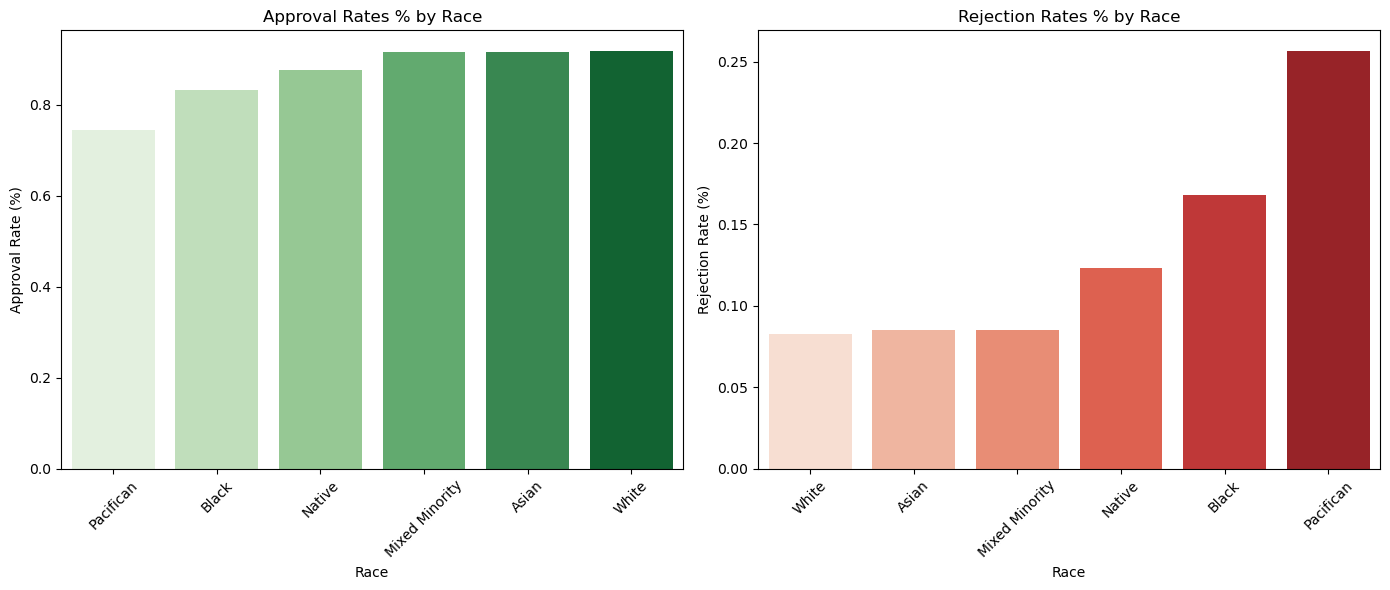

In [32]:
# Calculate the approval and disapproval rates by race
df_ratio = df.groupby(['derived_race', 'was_approved']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot approval rates
approval_rate = df_ratio[1].sort_values(ascending=True)
sns.barplot(x=approval_rate.index, y=approval_rate.values, ax=axes[0], palette='Greens')
axes[0].set_title('Approval Rates % by Race')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Approval Rate (%)')
axes[0].tick_params(axis='x', rotation=45)

# Plot disapproval rates
disapproval_rate = df_ratio[0].sort_values(ascending=True)
sns.barplot(x=disapproval_rate.index, y=disapproval_rate.values, ax=axes[1], palette='Reds')
axes[1].set_title('Rejection Rates % by Race')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Rejection Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

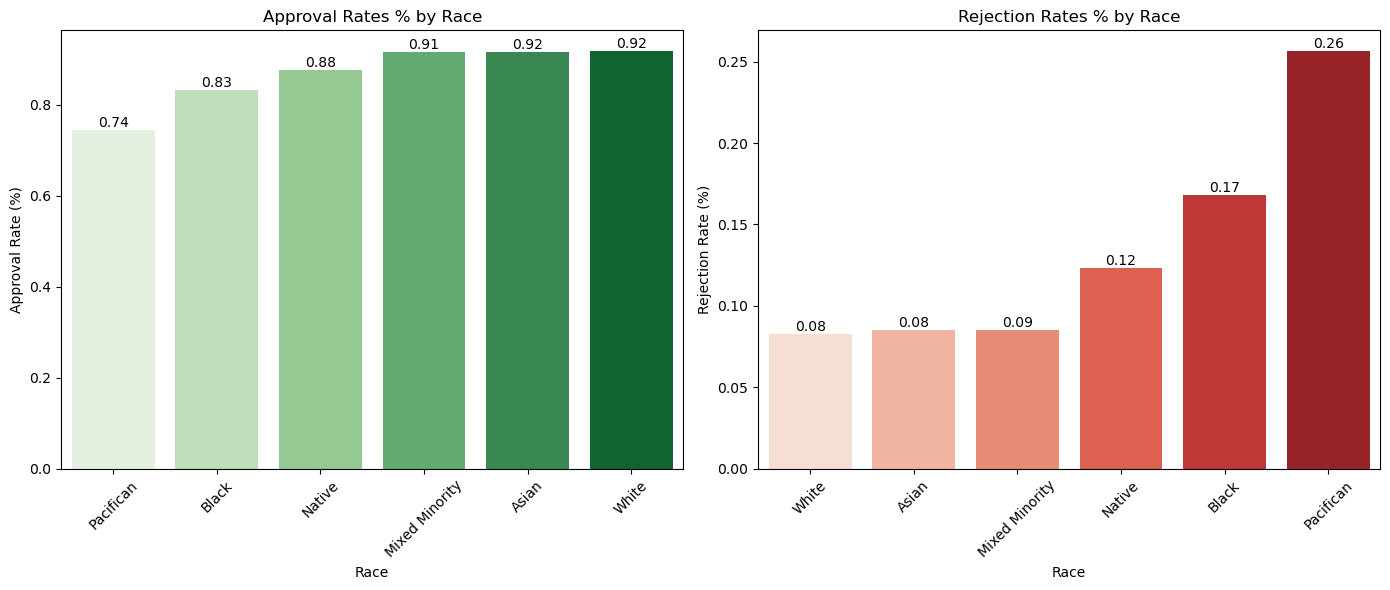

In [33]:
# Calculate the approval and disapproval rates by race
df_ratio = df.groupby(['derived_race', 'was_approved']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot approval rates
approval_rate = df_ratio[1].sort_values(ascending=True)
ax = sns.barplot(x=approval_rate.index, y=approval_rate.values, ax=axes[0], palette='Greens')
axes[0].set_title('Approval Rates % by Race')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Approval Rate (%)')
axes[0].tick_params(axis='x', rotation=45)



# Add text annotations with rounded values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            f'{p.get_height():.2f}',  # Format to 2 decimal places
            ha='center', va='bottom')

# Plot disapproval rates
disapproval_rate = df_ratio[0].sort_values(ascending=True)
ax = sns.barplot(x=disapproval_rate.index, y=disapproval_rate.values, ax=axes[1], palette='Reds')
axes[1].set_title('Rejection Rates % by Race')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Rejection Rate (%)')
plt.xticks(rotation=45)

# Add text annotations with rounded values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            f'{p.get_height():.2f}',  # Format to 2 decimal places
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [34]:
df_ratio

was_approved,0,1
derived_race,,
Asian,0.084888,0.915112
Black,0.167941,0.832059
Mixed Minority,0.085106,0.914894
Native,0.123404,0.876596
Pacifican,0.256410,0.743590
White,0.082856,0.917144


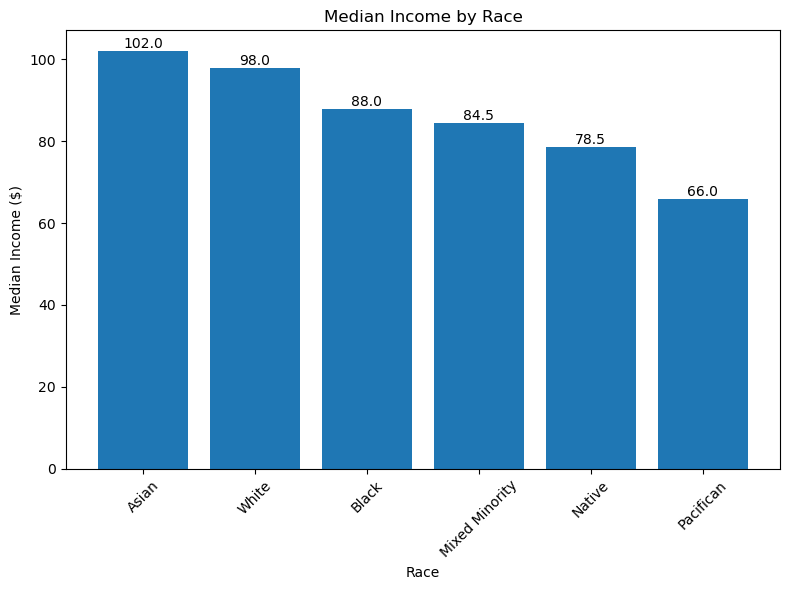

In [35]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
median_income_by_race = df.groupby('derived_race')['income'].median().sort_values(ascending=False)
median_income_by_race = median_income_by_race.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(median_income_by_race['derived_race'], median_income_by_race['income'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Income ($)')
plt.title('Median Income by Race')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
df_app = df[df['was_approved'] ==1]
df_rej = df[df['was_approved'] ==0]

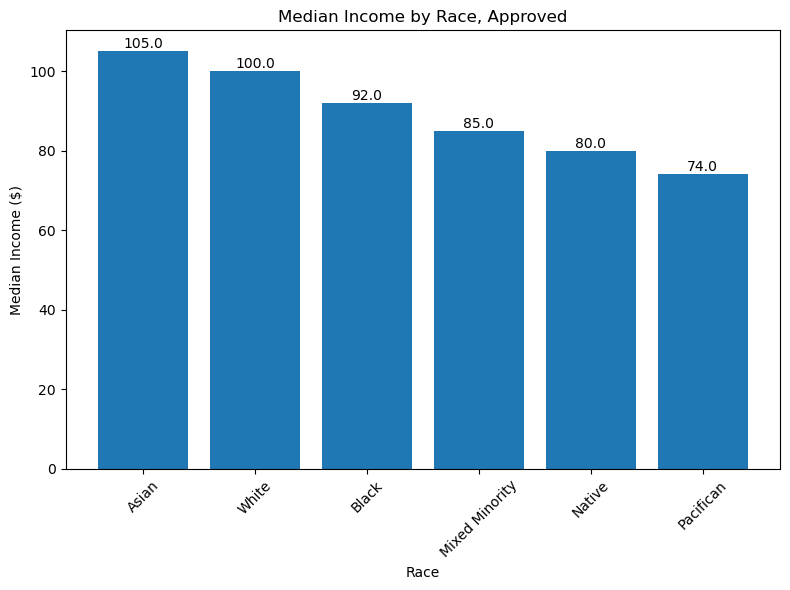

In [37]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
median_income_by_race = df_app.groupby('derived_race')['income'].median().sort_values(ascending=False)
median_income_by_race = median_income_by_race.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(median_income_by_race['derived_race'], median_income_by_race['income'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Income ($)')
plt.title('Median Income by Race, Approved')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

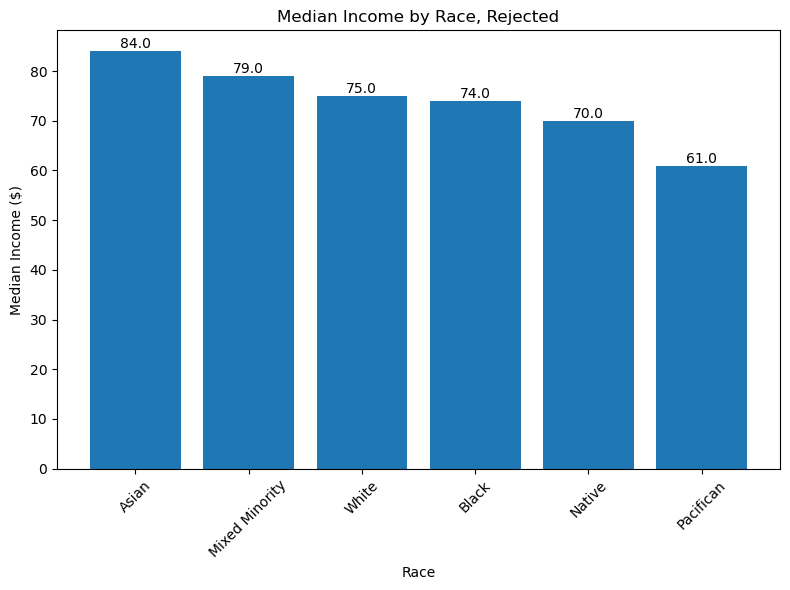

In [38]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
median_income_by_race = df_rej.groupby('derived_race')['income'].median().sort_values(ascending=False)
median_income_by_race = median_income_by_race.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(median_income_by_race['derived_race'], median_income_by_race['income'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Income ($)')
plt.title('Median Income by Race, Rejected')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

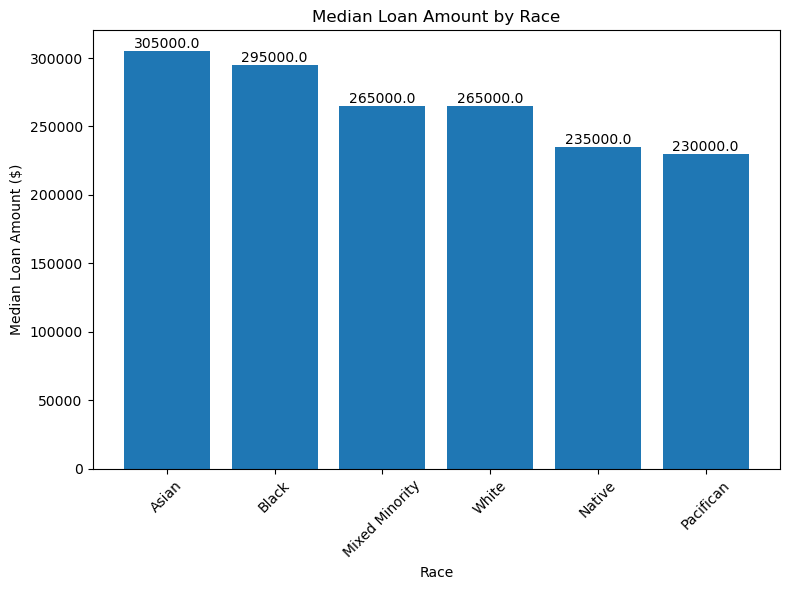

In [39]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('derived_race')['loan_amount'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['loan_amount'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Loan Amount ($)')
plt.title('Median Loan Amount by Race')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

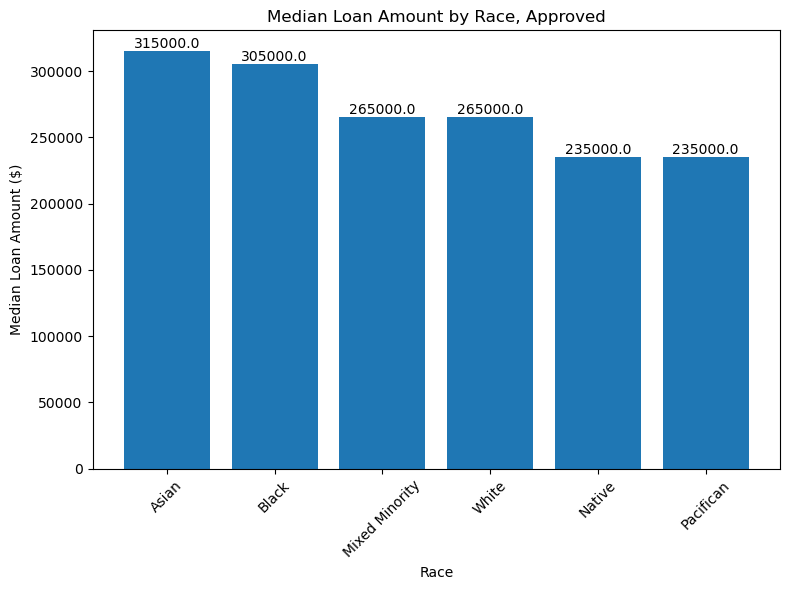

In [40]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df_app.groupby('derived_race')['loan_amount'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['loan_amount'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Loan Amount ($)')
plt.title('Median Loan Amount by Race, Approved')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

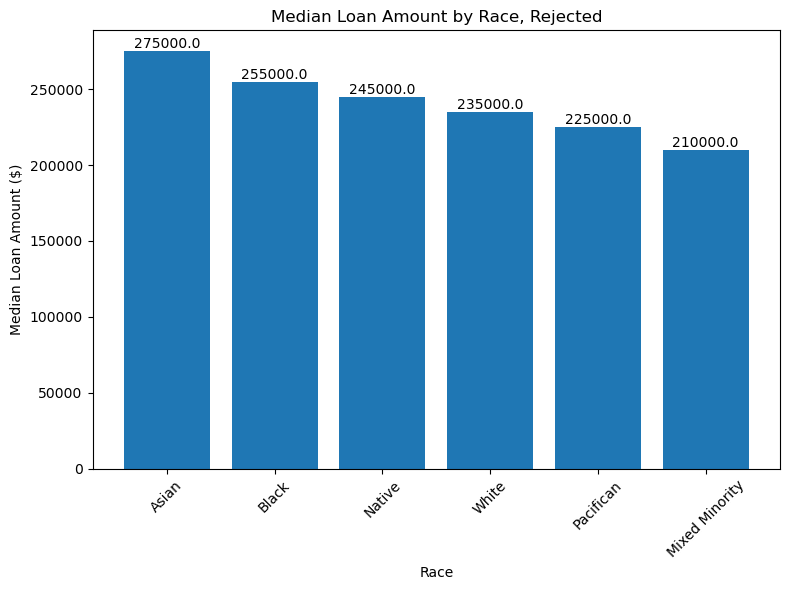

In [41]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df_rej.groupby('derived_race')['loan_amount'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['loan_amount'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Loan Amount ($)')
plt.title('Median Loan Amount by Race, Rejected')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

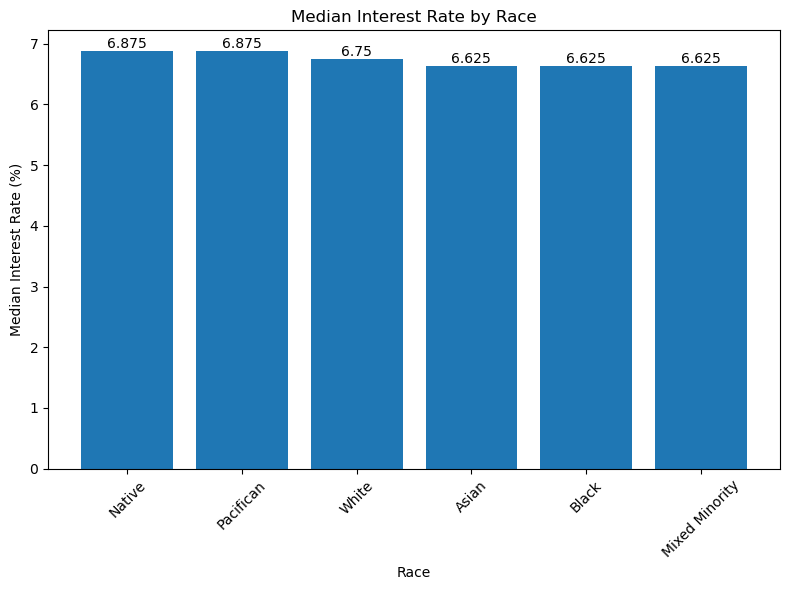

In [42]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('derived_race')['interest_rate'].median().sort_values(ascending=False)
focus = focus.reset_index()





# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['interest_rate'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Interest Rate (%)')
plt.title('Median Interest Rate by Race')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

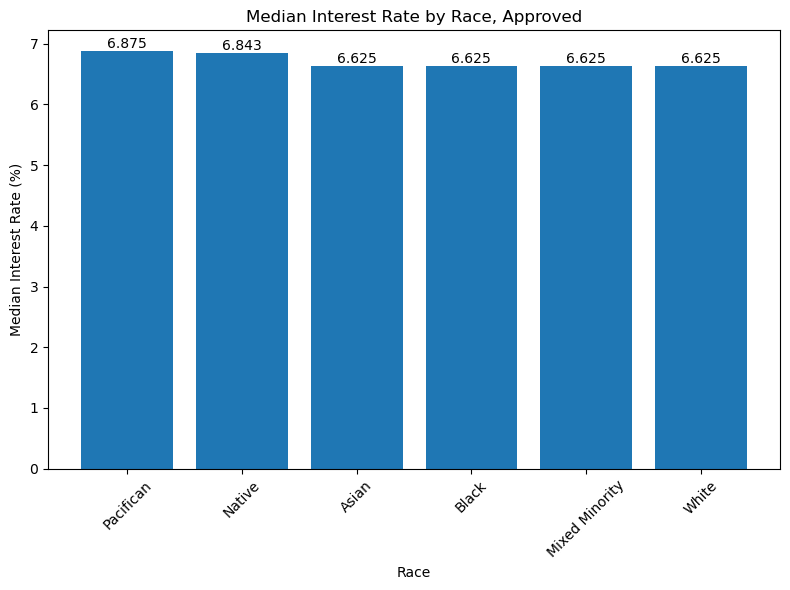

In [43]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df_app.groupby('derived_race')['interest_rate'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['interest_rate'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Interest Rate (%)')
plt.title('Median Interest Rate by Race, Approved')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

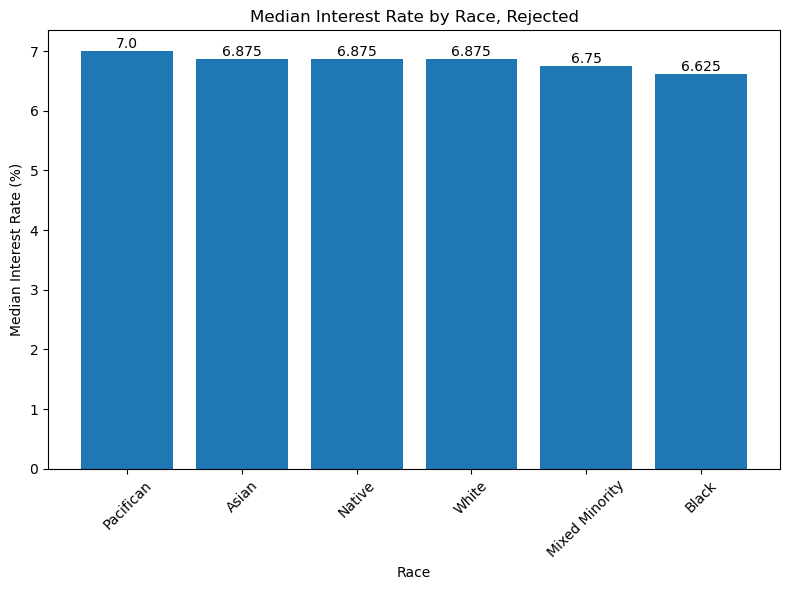

In [44]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df_rej.groupby('derived_race')['interest_rate'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['interest_rate'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Interest Rate (%)')
plt.title('Median Interest Rate by Race, Rejected')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

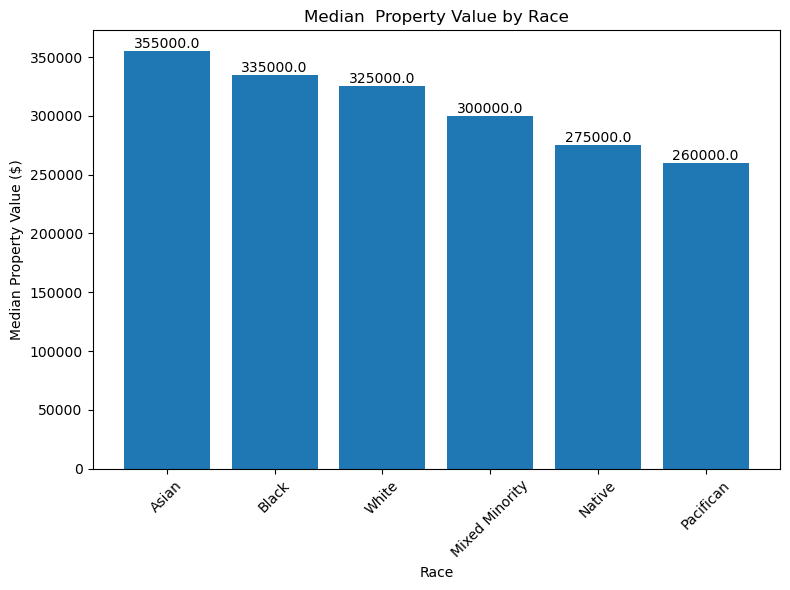

In [45]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('derived_race')['property_value'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['property_value'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Property Value ($)')
plt.title('Median  Property Value by Race')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

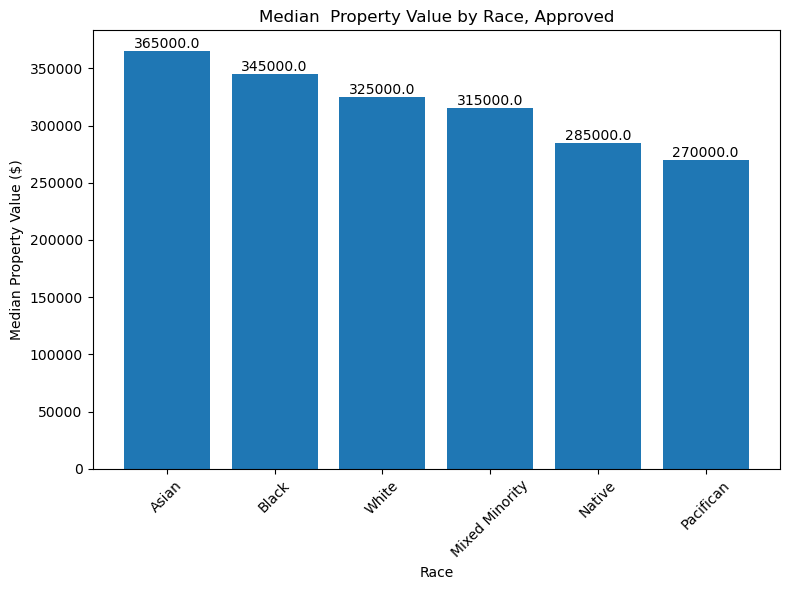

In [46]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df_app.groupby('derived_race')['property_value'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['property_value'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Property Value ($)')
plt.title('Median  Property Value by Race, Approved')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

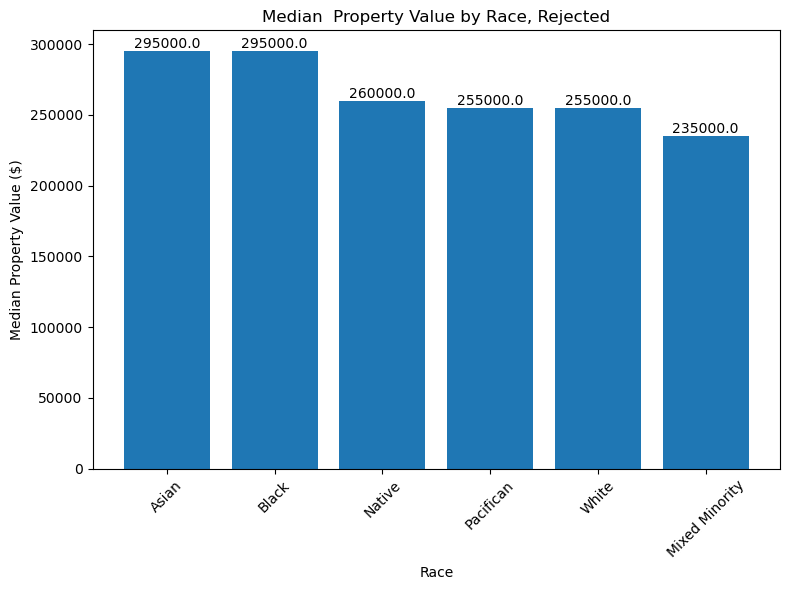

In [47]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df_rej.groupby('derived_race')['property_value'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['derived_race'], focus['property_value'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median Property Value ($)')
plt.title('Median  Property Value by Race, Rejected')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

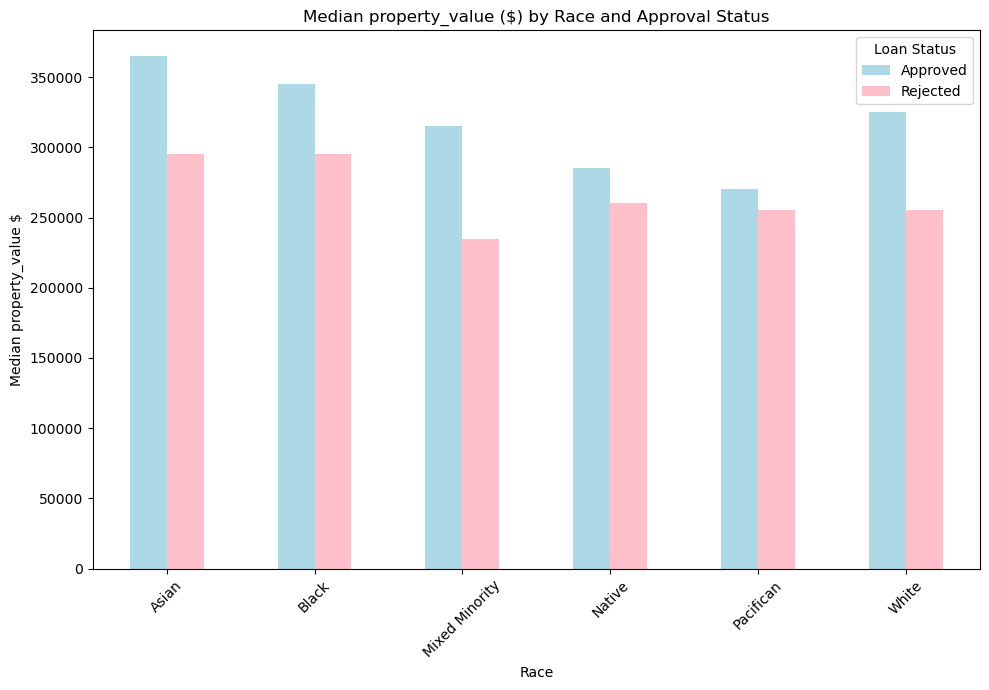

In [77]:
# Replace 'race', 'rural_urban', and 'income' with actual column names in your dataset
df_alt = df.copy()

df_alt['was_approved'] = df_alt['was_approved'].replace(0, 'Rejected')
df_alt['was_approved'] = df_alt['was_approved'].replace(1, 'Approved')

mfdocus= df_alt.groupby(['derived_race', 'was_approved'])['property_value'].median().unstack()


# Plotting the bar graph
mfdocus.plot(kind='bar', figsize=(10, 7), color=['lightblue', 'pink'])

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Median property_value $')
plt.title('Median property_value ($) by Race and Approval Status')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

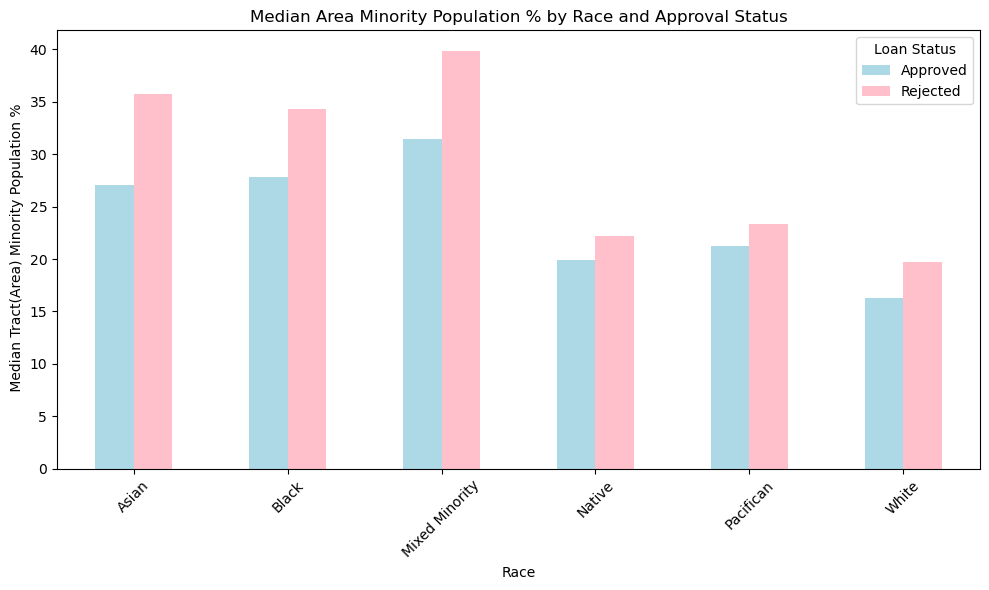

In [79]:
# Replace 'race', 'rural_urban', and 'income' with actual column names in your dataset
df_alt = df.copy()

df_alt['was_approved'] = df_alt['was_approved'].replace(0, 'Rejected')
df_alt['was_approved'] = df_alt['was_approved'].replace(1, 'Approved')

median_income_by_race_and_rural_urban = df_alt.groupby(['derived_race', 'was_approved'])['tract_minority_population_percent'].median().unstack()


# Plotting the bar graph
median_income_by_race_and_rural_urban.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'pink'])

# Adding labels and title
plt.xlabel('Race')
plt.ylabel(' Median Tract(Area) Minority Population %')
plt.title('Median Area Minority Population % by Race and Approval Status')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

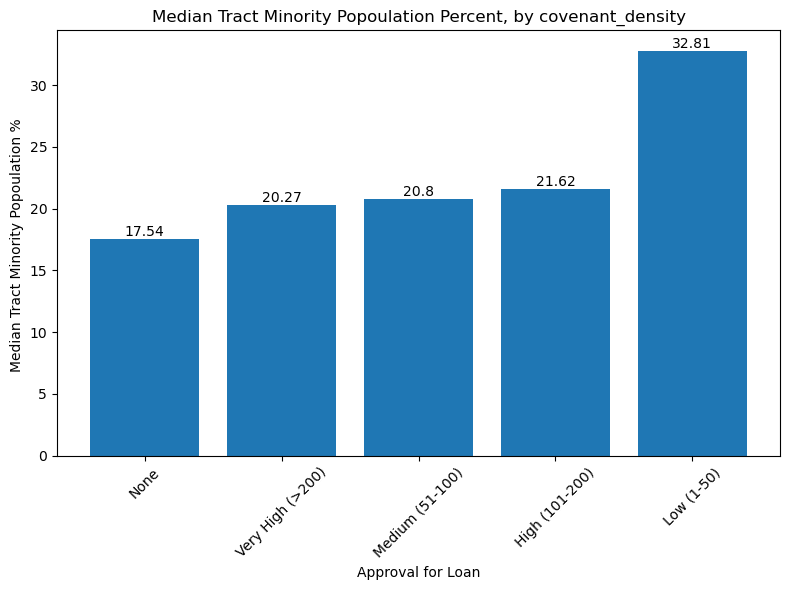

In [50]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('covenant_density')['tract_minority_population_percent'].median().sort_values(ascending=True)
focus = focus.reset_index()

#focus['was_approved'] = focus['was_approved'].replace(0, 'No')
#focus['was_approved'] = focus['was_approved'].replace(1, 'Yes')


# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['covenant_density'], focus['tract_minority_population_percent'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Approval for Loan')
plt.ylabel('Median Tract Minority Popoulation % ')
plt.title('Median Tract Minority Popoulation Percent, by covenant_density')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [51]:
df['covenant_density'].value_counts()

None                50978
Low (1-50)           2598
Very High (>200)     1788
Medium (51-100)      1024
High (101-200)        997
Name: covenant_density, dtype: int64

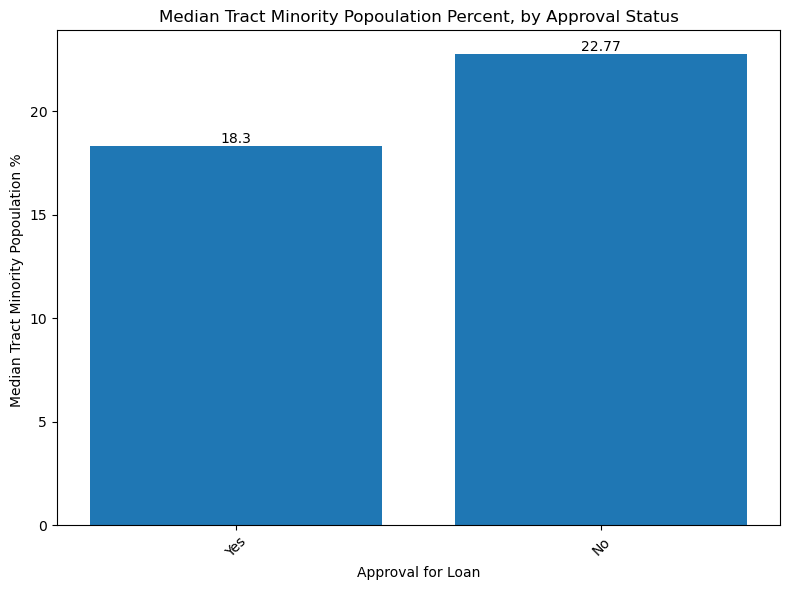

In [52]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('was_approved')['tract_minority_population_percent'].median().sort_values(ascending=True)
focus = focus.reset_index()

focus['was_approved'] = focus['was_approved'].replace(0, 'No')
focus['was_approved'] = focus['was_approved'].replace(1, 'Yes')


# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['was_approved'], focus['tract_minority_population_percent'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Approval for Loan')
plt.ylabel('Median Tract Minority Popoulation % ')
plt.title('Median Tract Minority Popoulation Percent, by Approval Status')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

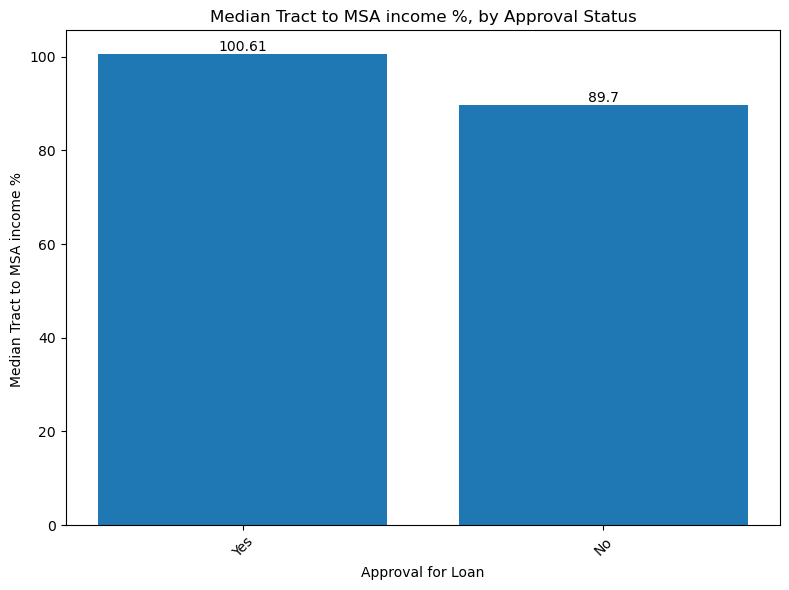

In [53]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('was_approved')['tract_to_msa_income_percentage'].median().sort_values(ascending=False)
focus = focus.reset_index()

focus['was_approved'] = focus['was_approved'].replace(0, 'No')
focus['was_approved'] = focus['was_approved'].replace(1, 'Yes')


# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['was_approved'], focus['tract_to_msa_income_percentage'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Approval for Loan')
plt.ylabel('Median Tract to MSA income % ')
plt.title('Median Tract to MSA income %, by Approval Status')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [54]:
mode_body_type_by_race = df_rej.groupby('derived_race')['action_taken'].agg(lambda x: x.mode()[0])
mode_body_type_by_race

derived_race
Asian             6
Black             6
Mixed Minority    6
Native            6
Pacifican         6
White             6
Name: action_taken, dtype: int64

In [55]:
df_black =  df[df['derived_race'] =='Black']
df_asian =  df[df['derived_race'] =='Asian']
df_mixed =  df[df['derived_race'] =='Mixed Minority']
df_native_m =  df[df['derived_race'] =='Native-Main']
df_native_o =  df[df['derived_race'] =='Native-Ocean']
df_white =  df[df['derived_race'] =='White']



In [56]:
df_black['covenant_count'].value_counts()

0.0      3179
9.0        55
2.0        51
3.0        41
4.0        41
         ... 
375.0       1
32.0        1
69.0        1
25.0        1
143.0       1
Name: covenant_count, Length: 75, dtype: int64

In [57]:
df_white['covenant_count'].value_counts()

0.0      43253
1.0        278
3.0        242
2.0        198
7.0        130
         ...  
126.0       14
485.0       13
176.0       13
33.0        12
15.0         8
Name: covenant_count, Length: 112, dtype: int64

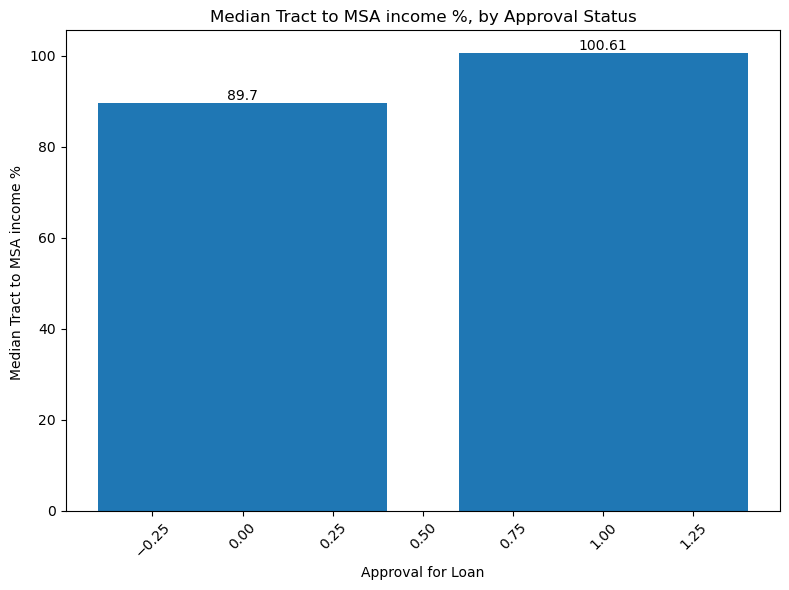

In [58]:
# Load your dataset


# Replace 'race' and 'income' with the actual column names from your dataset
focus = df.groupby('was_approved')['tract_to_msa_income_percentage'].median().sort_values(ascending=False)
focus = focus.reset_index()




# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(focus['was_approved'], focus['tract_to_msa_income_percentage'])

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Approval for Loan')
plt.ylabel('Median Tract to MSA income % ')
plt.title('Median Tract to MSA income %, by Approval Status')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

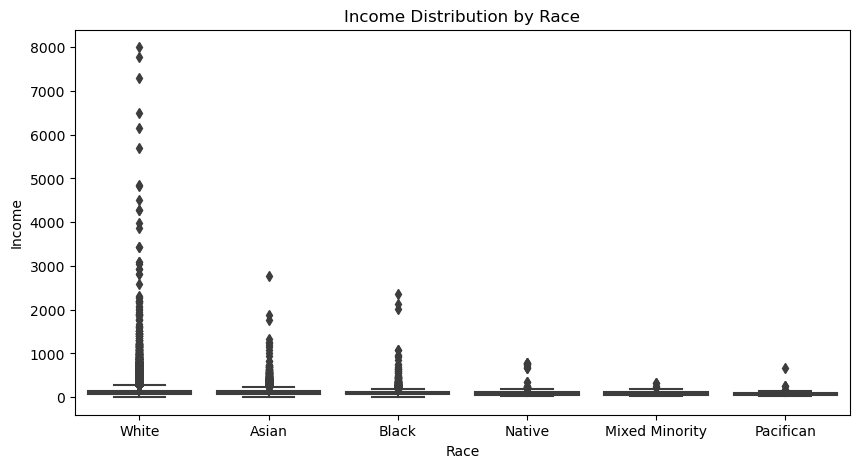

In [59]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='income', data=df)

# Customize the plot (optional)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Income')

# Show the plot
plt.show()

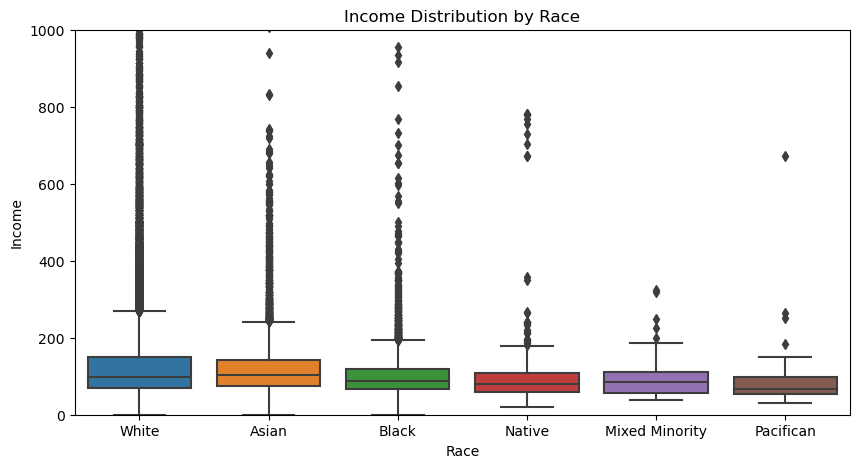

In [60]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='income', data=df)

# Customize the plot (optional)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Income')

# Set the y-axis limits
plt.ylim(0, 1000)  # Set y-axis max value to 
# Show the plot
plt.show()

In [61]:
df_app = df[df['was_approved'] ==1]
df_rej = df[df['was_approved'] ==0]

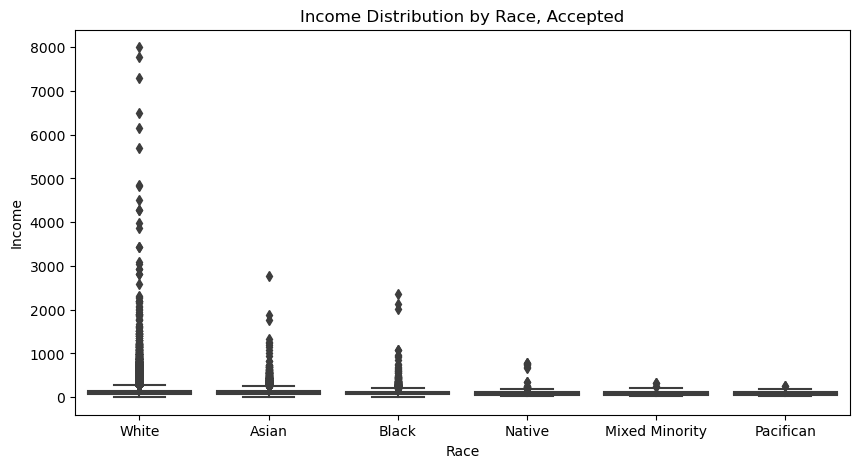

In [62]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='income', data=df_app)

# Customize the plot (optional)
plt.title('Income Distribution by Race, Accepted')
plt.xlabel('Race')
plt.ylabel('Income')

# Show the plot
plt.show()

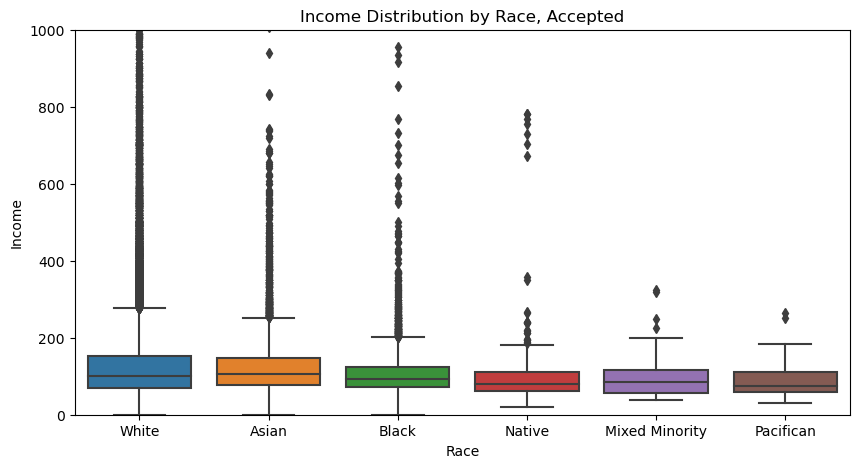

In [63]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='income', data=df_app)

# Customize the plot (optional)
plt.title('Income Distribution by Race, Accepted')
plt.xlabel('Race')
plt.ylabel('Income')
# Set the y-axis limits
plt.ylim(0, 1000)  # Set y-axis max value to 
# Show the plot
plt.show()


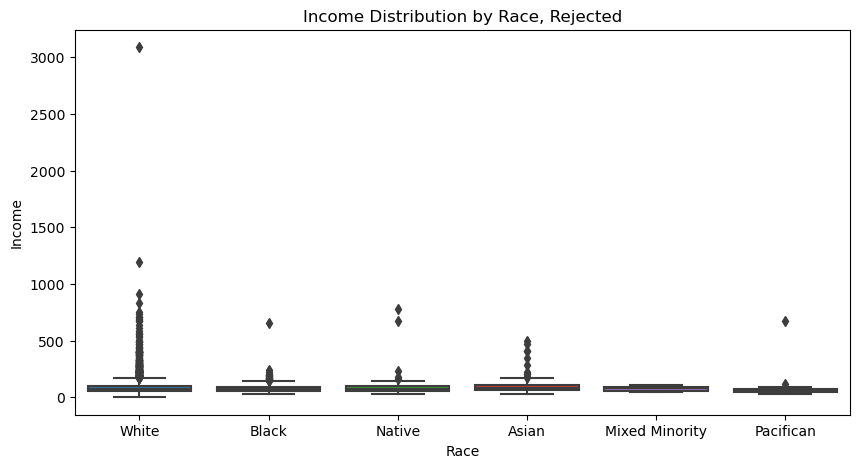

In [64]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='income', data=df_rej)

# Customize the plot (optional)
plt.title('Income Distribution by Race, Rejected')
plt.xlabel('Race')
plt.ylabel('Income')

# Show the plot
plt.show()

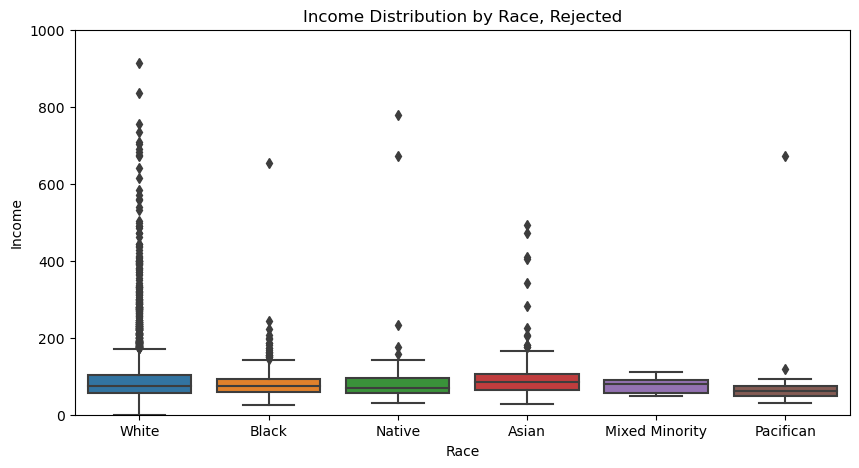

In [65]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='income', data=df_rej)

# Customize the plot (optional)
plt.title('Income Distribution by Race, Rejected')
plt.xlabel('Race')
plt.ylabel('Income')
# Set the y-axis limits
plt.ylim(0, 1000)  # Set y-axis max value to 
# Show the plot
plt.show()

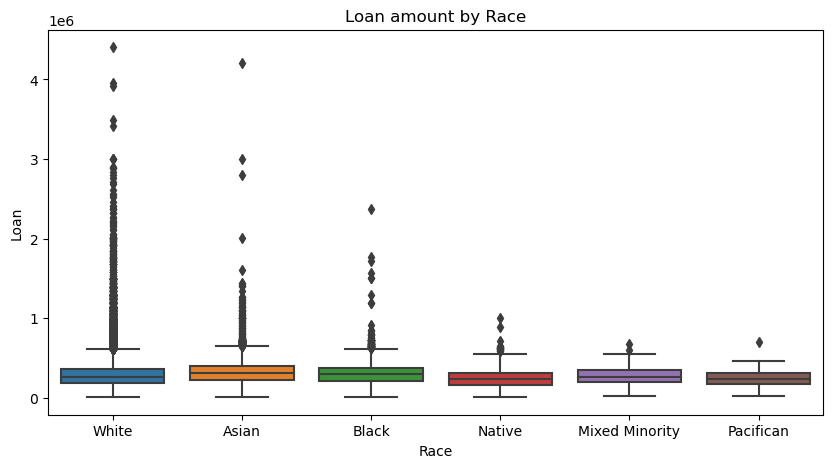

In [66]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='loan_amount', data=df)

# Customize the plot (optional)
plt.title('Loan amount by Race')
plt.xlabel('Race')
plt.ylabel('Loan')



# Show the plot
plt.show()

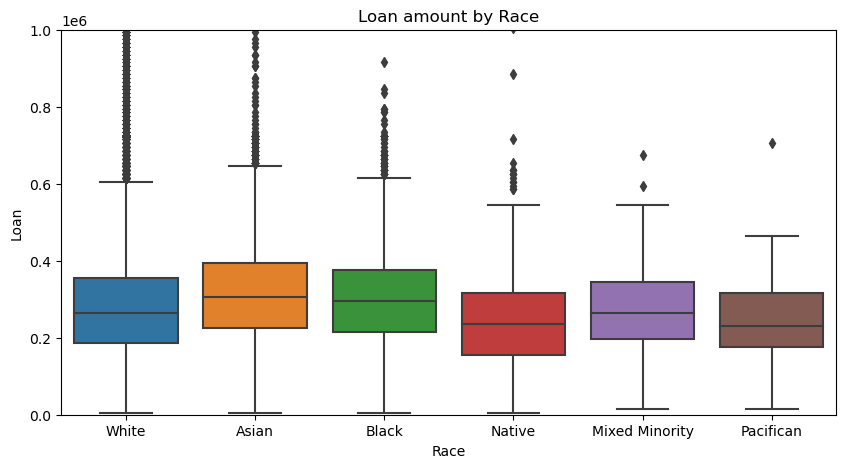

In [67]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='loan_amount', data=df)

# Customize the plot (optional)
plt.title('Loan amount by Race')
plt.xlabel('Race')
plt.ylabel('Loan')

# Set the y-axis limits
plt.ylim(0, 1000000)  # Set y-axis max value to  

# Show the plot
plt.show()

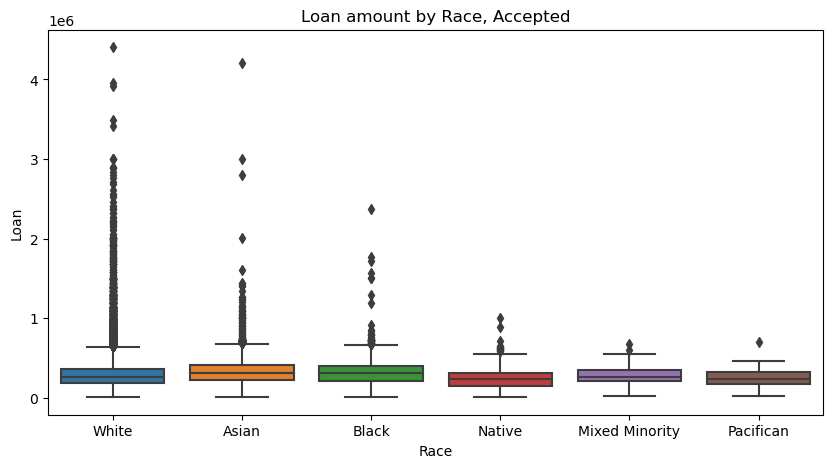

In [68]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='loan_amount', data=df_app)

# Customize the plot (optional)
plt.title('Loan amount by Race, Accepted')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

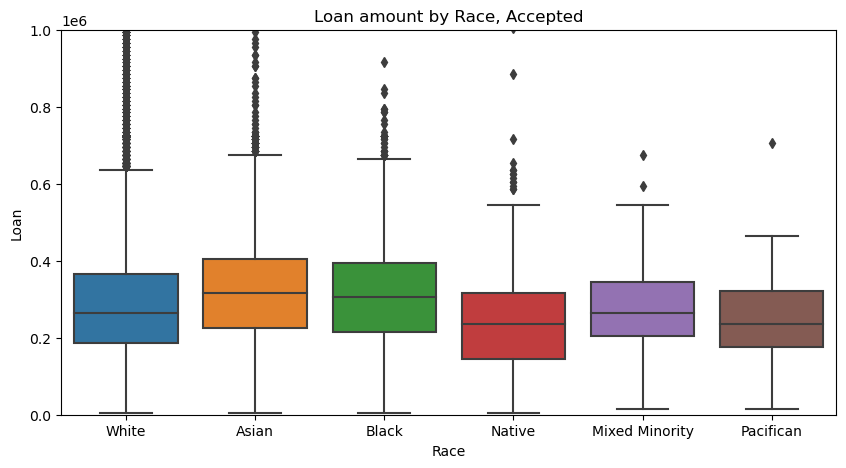

In [69]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='loan_amount', data=df_app)

# Customize the plot (optional)
plt.title('Loan amount by Race, Accepted')
plt.xlabel('Race')
plt.ylabel('Loan')

# Set the y-axis limits
plt.ylim(0, 1000000)  # Set y-axis max value to  

# Show the plot
plt.show()

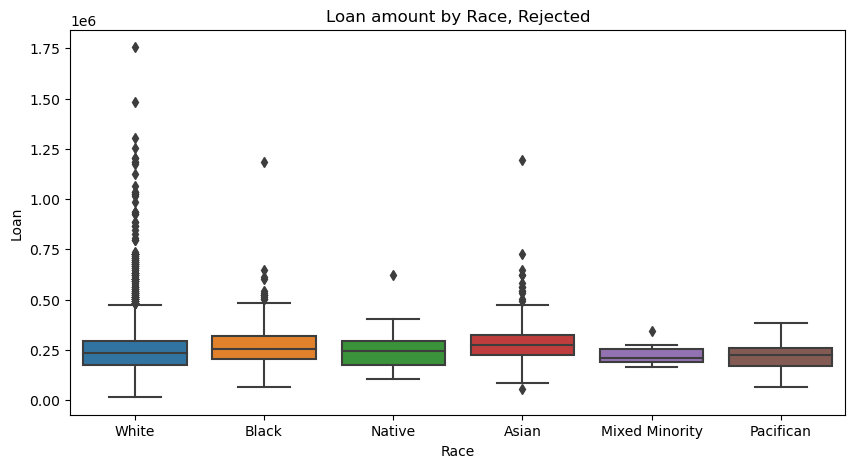

In [70]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='loan_amount', data=df_rej)

# Customize the plot (optional)
plt.title('Loan amount by Race, Rejected')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

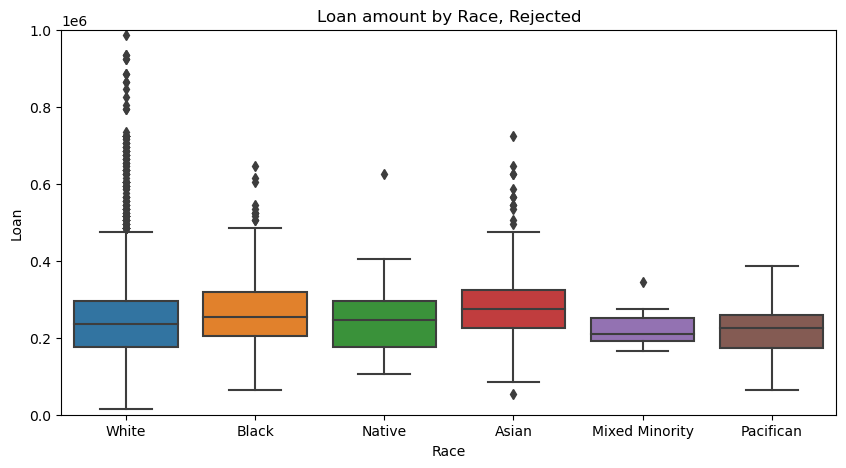

In [71]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='loan_amount', data=df_rej)

# Customize the plot (optional)
plt.title('Loan amount by Race, Rejected')
plt.xlabel('Race')
plt.ylabel('Loan')

# Set the y-axis limits
plt.ylim(0, 1000000)  # Set y-axis max value to  

# Show the plot
plt.show()

In [72]:
df['loan_amount'].value_counts()

15000.0      2134
245000.0     1927
255000.0     1884
265000.0     1820
225000.0     1816
             ... 
2685000.0       1
1885000.0       1
4405000.0       1
1455000.0       1
2255000.0       1
Name: loan_amount, Length: 222, dtype: int64

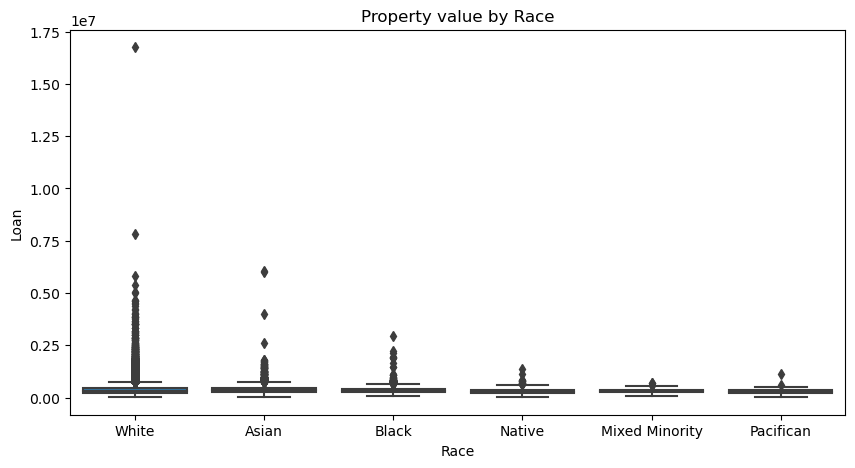

In [73]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='property_value', data=df)

# Customize the plot (optional)
plt.title('Property value by Race')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

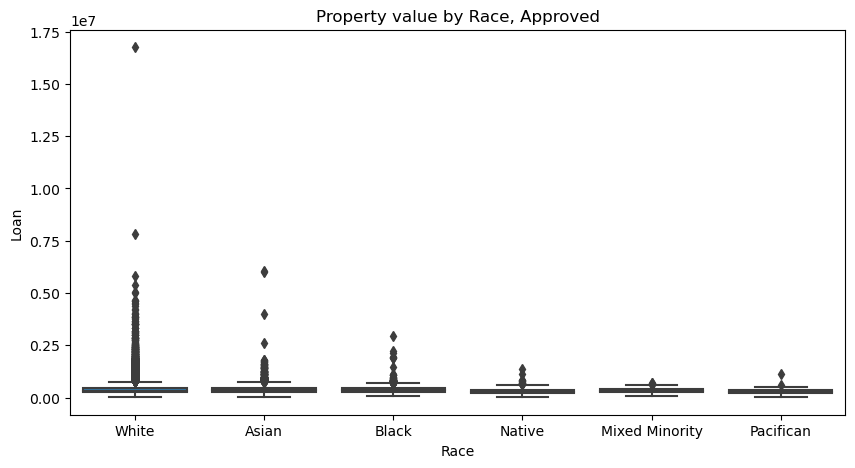

In [74]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='property_value', data=df_app)

# Customize the plot (optional)
plt.title('Property value by Race, Approved')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

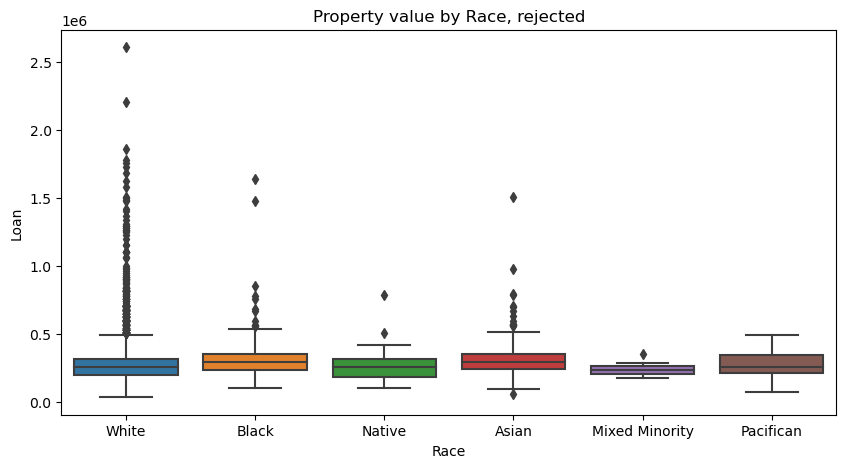

In [75]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='property_value', data=df_rej)

# Customize the plot (optional)
plt.title('Property value by Race, rejected')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

In [76]:
property_value

NameError: name 'property_value' is not defined

In [ ]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='interest_rate', data=df)

# Customize the plot (optional)
plt.title('Interest Rate by Race')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

In [ ]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='interest_rate', data=df_app)

# Customize the plot (optional)
plt.title('Interest Rate by Race, approved')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()

In [ ]:
# Create the box plot
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='derived_race', y='interest_rate', data=df_rej)

# Customize the plot (optional)
plt.title('Interest Rate by Race, rejected')
plt.xlabel('Race')
plt.ylabel('Loan')

# Show the plot
plt.show()